# INFO 2950 Homework 6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, norm
from numpy import random
import seaborn as sns

# Probability Distributions

### Probability Models Cheatsheet
| Model | Example | Random Variable | Parameters | Probability Mass Function |
| --- | --- | --- | --- | --- |
| Binomial | flip a coin n times | $X$ = number of successful coin flips {0, 1, ..., n} | $n$ = number of trials, $p$ = probability | $\binom{n}{x} p^x (1-p)^{n-x} $|
| Geometric | flip a coin until success | $X$ = number of failures before success {0, 1, ..., k} | $k$ = trial number, $p$ = probability | $p(1-p)^{k-1}$ |
| Poisson | number of successful coin flips within a fixed interval | $X$ = number of events within a fixed interval | $k$ = trial number, $\lambda$ = rate parameter, $p$ = probability | $\dfrac{\lambda^ke^{-\lambda}}{k!}$ |
| Negative Binomial | number of coin flips to reach a number of successes | $X$ = number of trials until the $r^{th}$ success| $x$ = trial number, $r$ = number of successes, $p$ = probability | $\binom{x-1}{r-1}(1-p)^{x-r}p^r$


---

### Problem 0 (10 points)

Calculate the probability for each of the following scenarios. Hint: you'll want to alternate between using the cumulative distribution function (CDF) and probability mass function (PMF) according to the scenario. You can use functions from the `scipy.stats` package (e.g. here's the documentation for [SciPy's binomial functions](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html))

1. Professor Koenecke makes 60% of her free-throw attempts. If she shoots 12 free throws, what is the probability that she makes exactly 10? 
2. Professor Mimno flips a fair coin 5 times. What is the probability that the coin lands on heads 2 times or fewer? 
3. You roll a six-sided die 20 times. What is the probability of having exactly 8 rolls land on a number greater than 4? 


In [2]:
# 1 solution
binom.pmf(k = 10, n = 12, p = 0.6)

0.063852281856

In [3]:
# 2 solution
binom.cdf(k = 2, n = 5, p = 0.5)

0.5

In [4]:
# 3 solution
binom.pmf(k = 8, n = 20, p = 1/3)

0.14797964561617874

### Problem 1 (10 points)

The geometric distribution shows the number of trials before success. Create a function called `check_geometric_pmf`. This function should take two inputs:
1. Trial number
2. Probability

Based on those inputs, `check_geometric_pmf` should calculate the probability mass function (PMF) for the geometric model. The function should return this value. Make sure to write out the PMF fully (do not use a function from a Python module). 

Test your function to see the probability of success at the 3rd try, given a 20% probability.

Then, use this function to test the probability of the first success occurring for each trial in 20 consecutive events. Visualize your result in a bar graph, including informative x and y axis labels. Make sure that there is a numeric label for all 20 events (hint: you can specify the `tick_label` parameter). 

In [5]:
def check_geometric_pmf(trial, p):
    return p * (1-p)**(trial - 1)

In [6]:
p = 0.2
trial = 3
print('probability that the event will occur on the third try: ', check_geometric_pmf(trial, p))

probability that the event will occur on the third try:  0.12800000000000003


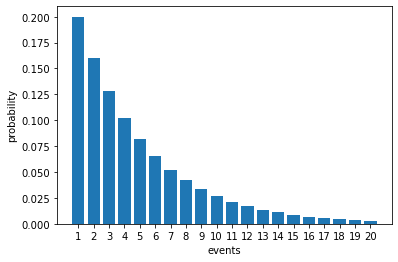

In [7]:
event_num = range(21)[1:]
prob_over_events = [check_geometric_pmf(x, p) for x in event_num]

plt.xlabel('events')
plt.ylabel('probability')
plt.bar(event_num, height = prob_over_events, tick_label = event_num);

### Problem 2 (10 points)
You want to learn about architecture on Cornell campus, so in between classes you ask random people whether they are Architecture majors (who account for 3.3% of the undergraduate student body). Using your function from Q1, what is the probability that you finally run into an Architecture major in the the 5th undergraduate student you speak to?  

In [8]:
check_geometric_pmf(5, 0.033)

0.028854917451393

### Problem 3 (10 points)

Use `np.random.normal` to generate four normal distributions, with sizes `20`, `100`, `1000`, and `3000`. All of these distributions should have a mean of `50` and standard deviation of `20`. We've already included a random seed of `2950` at the top. Make sure to keep this line of code!

Calculate and print the mean for all four distributions and use seaborn's `displot` to visualize each distribution.

Then, explain what you notice about the means and visualizations for each distribution. What happens as the size increases? 

In [9]:
np.random.seed(2950)
mean = 50
std = 20


norm_array_1 = np.random.normal(size = 20, loc = mean, scale = std)
norm_array_2 = np.random.normal(size = 100, loc = mean, scale = std)
norm_array_3 = np.random.normal(size = 1000, loc = mean, scale = std)
norm_array_4 = np.random.normal(size = 3000, loc = mean, scale = std)

print(np.mean(norm_array_1))
print(np.mean(norm_array_2))
print(np.mean(norm_array_3))
print(np.mean(norm_array_4))



40.53088479453623
50.28345798240403
49.92328162760616
49.510379120805126


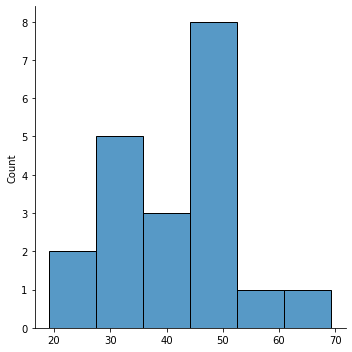

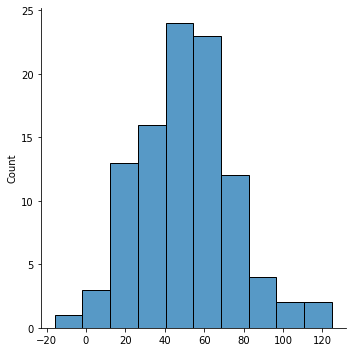

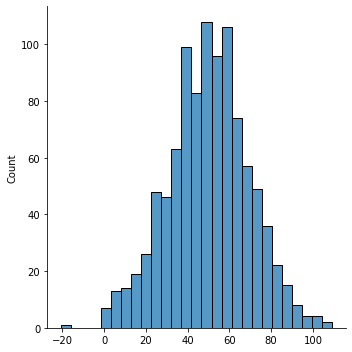

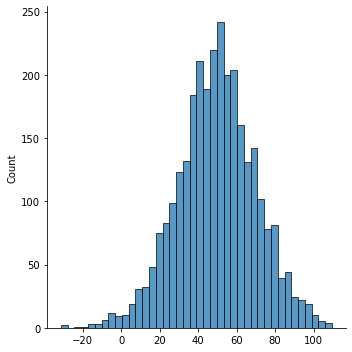

In [10]:
sns.displot(norm_array_1)
sns.displot(norm_array_2)
sns.displot(norm_array_3)
sns.displot(norm_array_4);


**Explain what you notice about the mean and visualizations**

As the size of a distribution increases, the mean of the array centers more around the mean that we identified when creating the array with numpy. The visualizations also reflect that the mean centers around 50 more when there are more data points in our distribution. We also see less skew, as the bell curve becomes more symmetrical. 

### Problem 4 (10 points)

You've just given out an exam to 230 students, and have found that the mean and median are both 80; the variance is 25, and the histogram looks like a bell curve. Without writing any code:

1. What type of distribution might be a good model for these scores? Explain your reasoning. 
2. How many students do you expect received between a 75% and 85% on the exam? Explain your reasoning. 
3. How many students received less than a 80% on the exam? Explain your reasoning.  
4. How many students received between a 90% and 95%? Explain your reasoning. 


**Your answer here**
1. This could be a normal distribution, or possibly binomial or Poisson.
2. Assuming this is a normal distribution, around 156-157 students, given that we know 68% of data in a normal-ish distribution falls within one standard deviation of the mean.
3. Around 115 students, given that 80% is the mean. 
4. Around 5 or 6 students (5.4). In a normal distribution, 99.7% of data is within three standard deviations of the mean. We want to find the percentage of data within two and three standard deviations from the mean, on the right side of the bell curve. 99.7 (three standard deviations) - 95% (two standard deviations) leaves 4.7% of data between above two and below three standard deviations of the mean. Since we are only looking for data on the higher end of the normal distribution, we divide this by 2, leaving 2.35% of data. 2.35% of 230 is 5.4. 


In the provided dataframe below we have data on the scientific productivity of PhD students ([source](https://rdrr.io/cran/scar/man/PhDPublications.html)). The column "articles" indicates the number of articles published in the last three years of their PhD.

In [11]:
df = pd.read_csv('PhDPublications.csv')
print(f'there are {len(df)} students')
df.head()

there are 915 students


,articles,gender,married,kids,prestige,mentor
0,0,male,yes,0,2.52,7
1,0,female,no,0,2.05,6
2,0,female,no,0,3.75,6
3,0,male,yes,1,1.18,3
4,0,female,no,0,3.75,26


### Problem 5 (10 points)

Create a histogram indicating the number of PhD students (y-axis) for each number of articles published (x-axis), with 20 bins. From the four models listed above, what do you think is the best choice to simulate the number of articles a PhD student can publish within the last three years of their PhD? Explain your reasoning.

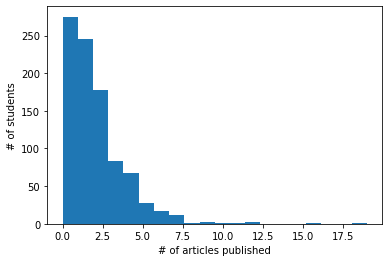

In [12]:
#### solution
plt.hist(df['articles'],bins=20)
plt.xlabel('# of articles published')
plt.ylabel('# of students');

**Explain which model you would choose**

Poisson because it simulates the number of events occuring within a fixed interval. It is a discrete distribution.

### Problem 6 (10 points)

Use `np.random.poisson` to generate 4 arrays. Each array should contain 1000 draws sampled from the Poisson distribution. Each array should have a different value for the event rate (i.e. the lambda parameter). The first should have $\lambda=0.5$, the second $\lambda=1$, the third $\lambda=2$, and the fourth $\lambda=5$. Plot a histogram for each of the four sampling arrays *on the same chart*, remember to use a legend and properly label your axes.

We've already included a random seed of `2950` at the top. Make sure to keep this line of code!

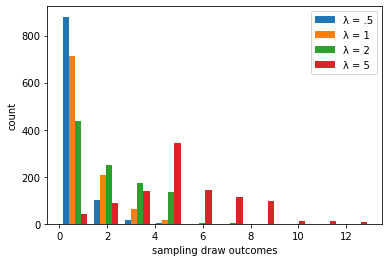

In [13]:
np.random.seed(2950)


####solution
array1= np.random.poisson(0.5,size=1000)
array2= np.random.poisson(1,size=1000)
array3= np.random.poisson(2,size=1000)
array4= np.random.poisson(5,size=1000)


plt.hist([array1, array2,array3, array4], label=[u'\u03BB = .5', u'\u03BB = 1', u'\u03BB = 2', u'\u03BB = 5'])
plt.legend(loc='upper right')
plt.xlabel('sampling draw outcomes')
plt.ylabel('count')
plt.show()

### Problem 7 (10 points)

The poisson distribution can be used to simulate the number of events occuring within a specific interval, in this case: the number of articles a PhD student publishes in their last three years.

In 1905, Albert Einstein had an "annus mirabilis," publishing 4 seminal papers. [Wikipedia](https://en.wikipedia.org/wiki/List_of_scientific_publications_by_Albert_Einstein) indicates he published 6 papers in total during the last three years of his PhD (excluding reviews).

Create a numpy array called `draws` containing 1000 draws from the poisson distribution using the average number of articles published per student as your event rate. Then create a histogram of these draws. Finally, use `pyplot.axvline()` to overlay a red, dotted, vertical line indicating the number of articles published by Albert Einstein in the last three years of his PhD.

We've already included a random seed of `2950` at the top. Make sure to keep this line of code!

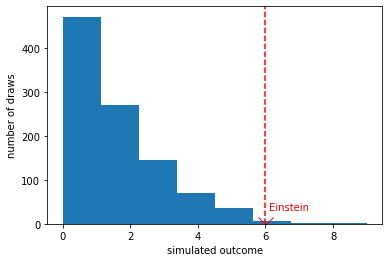

In [14]:
np.random.seed(2950)

#### solution
draws = np.random.poisson(df['articles'].mean(), size=1000)

plt.hist(draws,bins=8)
plt.axvline(x=6,color='red',linestyle='--')
plt.annotate("Einstein",(6.1,30),color='red')
plt.plot(6,0,'x',markersize=15,color='red')
plt.xlabel('simulated outcome')
plt.ylabel('number of draws');

### Problem 8 (10 points)

Using the same event rate parameter as before (i.e. the average number of articles published per student), what is the probablity that a PhD student publishes the same number of articles as Albert Einstein did in the last three years of their PhD. **Hint:** use `poisson.pmf()` from `scipy.stats`. Round your percentage to three decimal places.

In [15]:
#### solution
pct = round(poisson.pmf(6,df['articles'].mean())*100,3)
f"{pct} percent probability that a student publishes 6 papers within the last 3 years of their PhD given our probability model"

'0.601 percent probability that a student publishes 6 papers within the last 3 years of their PhD given our probability model'

### Problem 9 (10 points)

With the same distribution (i.e. using the same probability model), what is the probability that a student publishes more than 6 articles in the last three years of their PhD? **Hint:** use `poisson.sf()` from `scipy.stats`. Round your percentage to three decimal places.

In [16]:
#### solution
prob = round(poisson.sf(6,df['articles'].mean())*100,3)
f'{prob} percent probability that a student publishes more than 6 articles in their PhD'

'0.183 percent probability that a student publishes more than 6 articles in their PhD'